# Geely Auto - CarPrice Case Study

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends.
"CarPrice_Assignment.csv" has large dataset of different types of cars across the Americal market. 

Business Goal: 
Requirement is to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc.


In [86]:
# Importing all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Importing Car Price dataset to dataframe to do the analysis of all cars in US and European market
carprice = pd.read_csv('CarPrice_Assignment.csv')
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
# Split Car Company and Model value from column 'CarName' 
carprice[['carcompany','carmodel']]   = carprice["CarName"].str.split(' ', n=1, expand=True)

In [89]:
# Validating few rows from carprice dataframe
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany,carmodel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [90]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [91]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carcompany', 'carmodel'],
      dtype='object')

# Data Cleansing

Dropping car_ID, CarName and carmodel column which is of no use in this analysis.  

As mentioned in Data Preparation section of "Problem Statement - Part I": 

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building

In [92]:
carprice.drop(['car_ID'],axis=1,inplace=True)
carprice.drop(['CarName'],axis=1,inplace=True)
carprice.drop(['carmodel'],axis=1,inplace=True)

In [93]:
carprice.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carcompany'],
      dtype='object')

In [94]:
# Rearranging the column for analysis purpose.
carprice = carprice[['carcompany', 'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']]

In [95]:
carprice.head()

,carcompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Analyzing the data of categorial variables 

In [96]:
carprice['carcompany'] = carprice['carcompany'].str.lower()

In [97]:
print(carprice['carcompany'].unique())
print(carprice['fueltype'].unique())
print(carprice['aspiration'].unique())
print(carprice['doornumber'].unique())
print(carprice['carbody'].unique())
print(carprice['drivewheel'].unique())
print(carprice['enginelocation'].unique())
print(carprice['enginetype'].unique())
print(carprice['cylindernumber'].unique())
print(carprice['fuelsystem'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [98]:
carprice['carcompany'] = carprice['carcompany'].replace('maxda', 'mazda')
carprice['carcompany'] = carprice['carcompany'].replace('porcshce', 'porsche')
carprice['carcompany'] = carprice['carcompany'].replace('toyouta', 'toyota')
carprice['carcompany'] = carprice['carcompany'].replace('vokswagen', 'volkswagen')
carprice['carcompany'] = carprice['carcompany'].replace('vw', 'volkswagen') 

In [99]:
carprice['carcompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [100]:
# Creating initial copy of carprice dataframe for further analysis. 
carprice_df = carprice.copy()

In [101]:
carprice_df.head()

,carcompany,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
print(carprice_df['carcompany'].unique())
print(carprice_df['fueltype'].unique())
print(carprice_df['aspiration'].unique())
print(carprice_df['doornumber'].unique())
print(carprice_df['carbody'].unique())
print(carprice_df['drivewheel'].unique())
print(carprice_df['enginelocation'].unique())
print(carprice_df['enginetype'].unique())
print(carprice_df['cylindernumber'].unique())
print(carprice_df['fuelsystem'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [103]:
# Creating a dummy variable for categorical variable - carcompany
carcompany = pd.get_dummies(carprice_df['carcompany'], prefix='carcompany', drop_first=True)
carprice_df = pd.concat([carprice_df,carcompany],axis=1)

# Converting categorical variable to numeric - fueltype
carprice_df['fueltype'] = carprice_df['fueltype'].map({'gas': 1, 'diesel': 2})

# Converting categorical variable to numeric - aspiration
carprice_df['aspiration'] = carprice_df['aspiration'].map({'std': 1, 'turbo': 2})

# Converting categorical variable to numeric - doornumber
carprice_df['doornumber'] = carprice_df['doornumber'].map({'two': 2, 'four': 4})

# Creating a dummy variable for categorical variable - carbody
carbody = pd.get_dummies(carprice_df['carbody'], prefix='carbody', drop_first=True)
carprice_df = pd.concat([carprice_df,carbody],axis=1)

# Creating a dummy variable for categorical variable - drivewheel
drivewheel = pd.get_dummies(carprice_df['drivewheel'], prefix='drivewheel', drop_first=True)
carprice_df = pd.concat([carprice_df,drivewheel],axis=1)

# Converting categorical variable to numeric - enginelocation
carprice_df['enginelocation'] = carprice_df['enginelocation'].map({'front': 1, 'rear': 2})


# Creating a dummy variable for categorical variable - enginetype
enginetype = pd.get_dummies(carprice_df['enginetype'], prefix='enginetype', drop_first=True)
carprice_df = pd.concat([carprice_df,enginetype],axis=1)

# Converting categorical variable to numeric - cylindernumber
carprice_df['cylindernumber'] = carprice_df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})

# Creating a dummy variable for categorical variable - fuelsystem
fuelsystem = pd.get_dummies(carprice_df['fuelsystem'], prefix='fuelsystem', drop_first=True)
carprice_df = pd.concat([carprice_df,fuelsystem],axis=1)


# Dropping categorical variables as we have created the additional dummies for it
carprice_df.drop(['carcompany'],axis=1,inplace=True)
carprice_df.drop(['carbody'],axis=1,inplace=True)
carprice_df.drop(['drivewheel'],axis=1,inplace=True)
carprice_df.drop(['enginetype'],axis=1,inplace=True)
carprice_df.drop(['fuelsystem'],axis=1,inplace=True)

In [104]:
# Now let's see the top 5 rows of carprice_df dataframe.
carprice_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the Features 

In [105]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                        
# applying normalize ( ) to all columns 
carprice_df = carprice_df.apply(normalize) 

In [106]:
carprice_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.0,0.0,0.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.0,0.0,1.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.0,0.0,1.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Splitting Data into Training and Testing Sets

In [107]:
carprice_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carcompany_audi', 'carcompany_bmw', 'carcompany_buick',
       'carcompany_chevrolet', 'carcompany_dodge', 'carcompany_honda',
       'carcompany_isuzu', 'carcompany_jaguar', 'carcompany_mazda',
       'carcompany_mercury', 'carcompany_mitsubishi', 'carcompany_nissan',
       'carcompany_peugeot', 'carcompany_plymouth', 'carcompany_porsche',
       'carcompany_renault', 'carcompany_saab', 'carcompany_subaru',
       'carcompany_toyota', 'carcompany_volkswagen', 'carcompany_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'eng

In [108]:
# Putting feature variable to X
x = carprice_df[[
       'symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
    
       'carcompany_audi', 'carcompany_bmw', 'carcompany_buick', 'carcompany_chevrolet', 'carcompany_dodge', 'carcompany_honda', 
       'carcompany_isuzu', 'carcompany_jaguar', 'carcompany_mazda', 'carcompany_mercury', 'carcompany_mitsubishi', 
       'carcompany_nissan', 'carcompany_peugeot', 'carcompany_plymouth', 'carcompany_porsche', 'carcompany_renault', 
       'carcompany_saab', 'carcompany_subaru', 'carcompany_toyota', 'carcompany_volkswagen', 'carcompany_volvo',
       
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 
    
       'drivewheel_fwd', 'drivewheel_rwd', 
       
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 
       
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'
       ]]

# Putting response variable to y
y = carprice_df['price']

In [109]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7 ,test_size = 0.3, random_state=100 )

In [110]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

## Model Selection using RFE

In [111]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [112]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(x_train, y_train)


# List of columns selected by RFE
rfe_supported_col_obj = x_train.columns[rfe.support_]
rfe_supported_col = list(rfe_supported_col_obj)

# List of columns selected by RFE with Price dependent variable
rfe_supported_col_obj_withprice = x_train.columns[rfe.support_] 
rfe_supported_col_withprice = list(rfe_supported_col_obj_withprice)
rfe_supported_col_withprice.append('price')

# Total list of columns in carprice dataframe
carprice_all_columms = list(carprice_df.columns.values) 

# Columns that are dropped from carprice thorugh RFE elimination method
rfe_un_supported_col = [item for item in carprice_all_columms if item not in rfe_supported_col_withprice]

print('List of columns selected by RFE')
print('--------------------------------')
print(rfe_supported_col)
print(' ')
print('List of columns selected by RFE with Price dependent variable')
print('--------------------------------')
print(rfe_supported_col_withprice)
print(' ')
print('Columns that are dropped from carprice thorugh RFE elimination method')
print('--------------------------------')
print(rfe_un_supported_col)
print(' ')

List of columns selected by RFE
--------------------------------
['fueltype', 'enginelocation', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'carcompany_bmw', 'carcompany_peugeot', 'carcompany_porsche', 'enginetype_l']
 
List of columns selected by RFE with Price dependent variable
--------------------------------
['fueltype', 'enginelocation', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'carcompany_bmw', 'carcompany_peugeot', 'carcompany_porsche', 'enginetype_l', 'price']
 
Columns that are dropped from carprice thorugh RFE elimination method
--------------------------------
['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight', 'horsepower', 'citympg', 'highwaympg', 'carcompany_audi', 'carcompany_buick', 'carcompany_chevrolet', 'carcompany_dodge', 'carcompany_honda', 'carcompany_isuzu', 'carcompany_jaguar', 'carc

 ### Building model using sklearn : Model no 1 (RFE method) - lm1

In [113]:
# Creating x_train dataframe with RFE selected variables
x_train = x_train[rfe_supported_col]

In [114]:
 # Adding a constant variable 
import statsmodels.api as sm  
x_train = sm.add_constant(x_train)
lm1 = sm.OLS(y_train,x_train).fit()   # Running the linear model

In [115]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           2.29e-68
Time:                        21:29:40   Log-Likelihood:                 229.45
No. Observations:                 143   AIC:                            -426.9
Df Residuals:                     127   BIC:                            -379.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1231      0

In [116]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
9,compressionratio,78.57
4,curbweight,67.14
0,fueltype,60.19
2,carlength,57.64
3,carwidth,47.08
6,enginesize,46.57
5,cylindernumber,33.58
7,boreratio,18.68
12,carcompany_peugeot,13.64
8,stroke,13.07


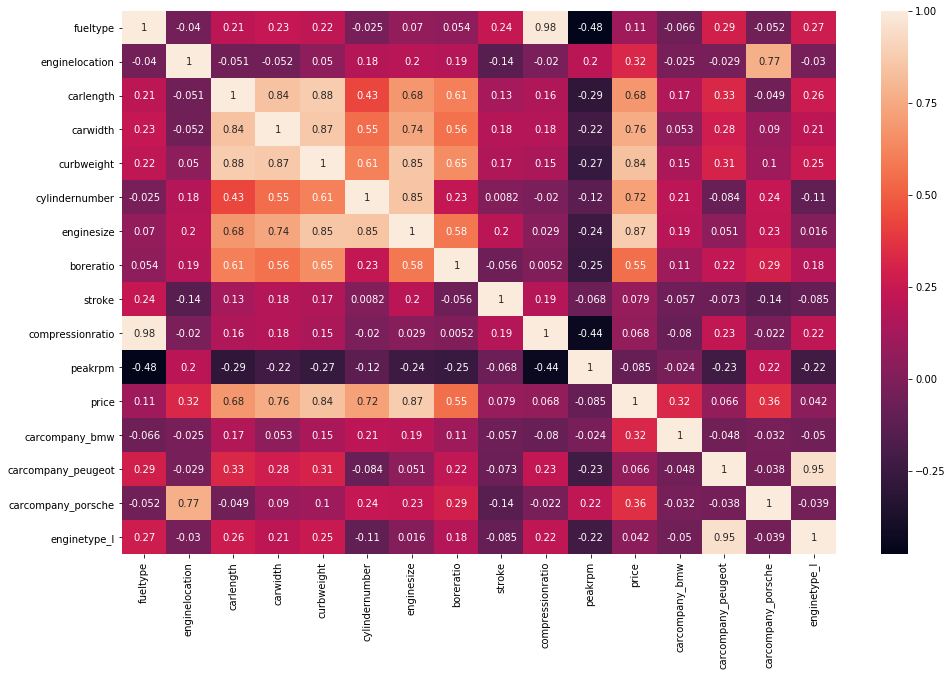

In [117]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 2 
#### Dropping the Variable "compressionratio" which has very high p-value and VIF 

In [118]:
#x_train.head()

In [119]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('compressionratio', 1)
rfe_un_supported_col.append('compressionratio') 

In [120]:
# Create a second fitted model
lm2 = sm.OLS(y_train,x_train).fit()

In [121]:
#Let's see the summary of our second linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           2.12e-69
Time:                        21:29:42   Log-Likelihood:                 229.35
No. Observations:                 143   AIC:                            -428.7
Df Residuals:                     128   BIC:                            -384.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1123      0

In [122]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
4,curbweight,62.76
2,carlength,52.68
3,carwidth,46.63
6,enginesize,41.45
5,cylindernumber,21.82
7,boreratio,16.17
11,carcompany_peugeot,13.30
8,stroke,13.06
13,enginetype_l,12.44
9,peakrpm,8.53


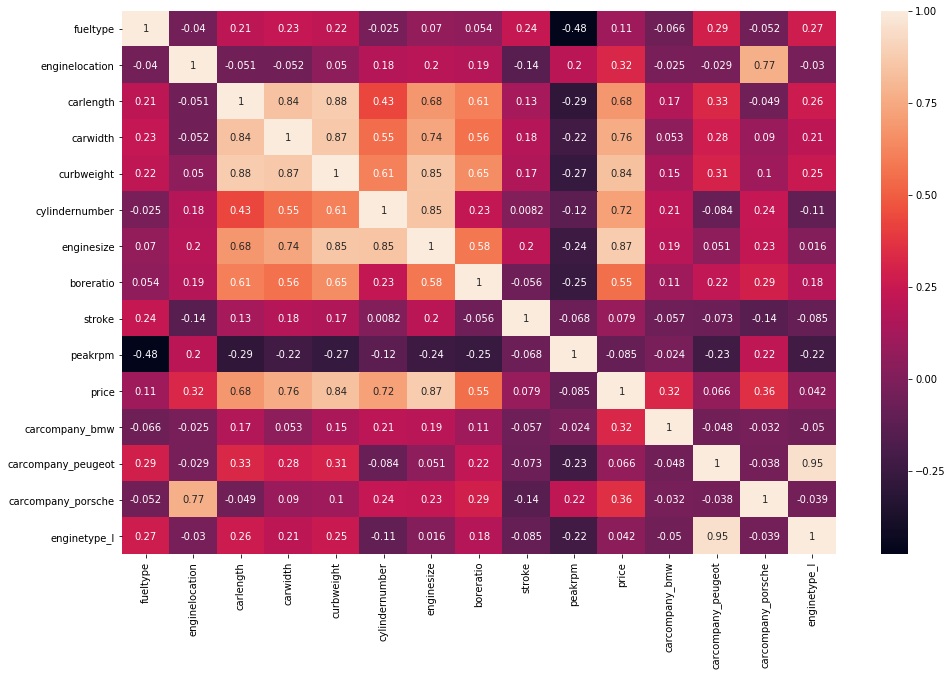

In [123]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 3
#### Dropping the Variable "carlength" which has very high p-value and VIF

In [124]:
x_train.head()

,const,fueltype,enginelocation,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.391045,0.291667,0.272692,0.2,0.139623,0.307143,0.552381,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.414925,0.666667,0.500388,0.2,0.339623,1.000000,0.495238,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.411940,0.308333,0.314973,0.2,0.139623,0.500000,0.480952,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.413433,0.316667,0.411171,0.2,0.260377,0.664286,0.290476,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.711940,0.575000,0.647401,0.2,0.260377,0.771429,0.514286,0.387755,0.0,0.0,0.0,0.0


In [125]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('carlength', 1)
rfe_un_supported_col.append('carlength')

In [126]:
# Create a second fitted model
lm3 = sm.OLS(y_train,x_train).fit()

In [127]:
#Let's see the summary of our second linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.60e-69
Time:                        21:29:45   Log-Likelihood:                 226.85
No. Observations:                 143   AIC:                            -425.7
Df Residuals:                     129   BIC:                            -384.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1183      0

In [128]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
3,curbweight,48.97
5,enginesize,38.98
2,carwidth,37.45
4,cylindernumber,21.64
6,boreratio,14.24
10,carcompany_peugeot,13.24
7,stroke,12.88
12,enginetype_l,12.39
8,peakrpm,8.51
1,enginelocation,2.89


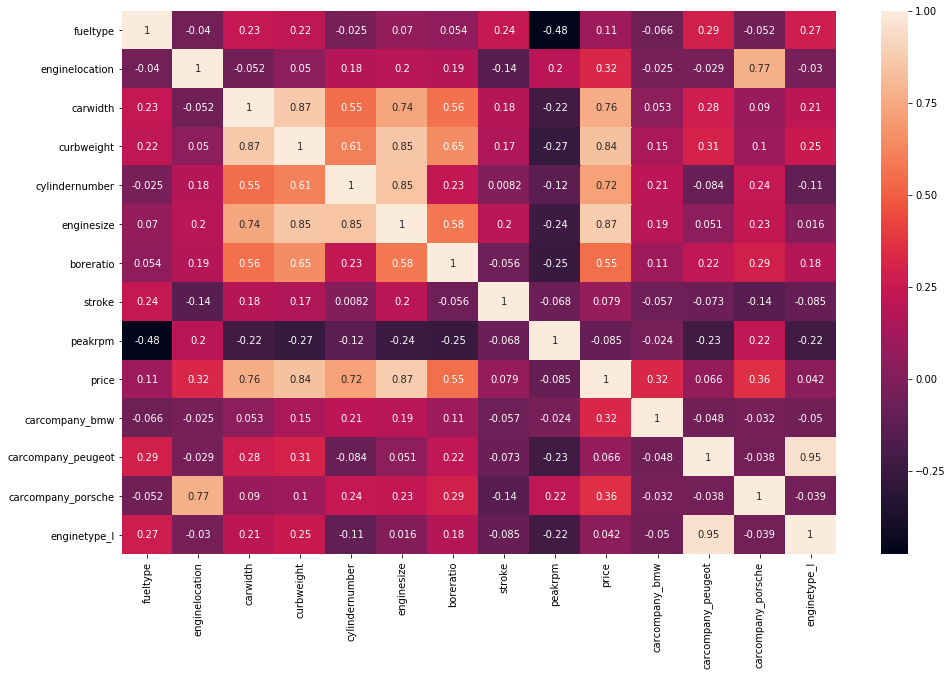

In [129]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 4
#### Dropping the Variable "enginesize" which has very high VIF and it is has multicollinearility with variable carwidth, curbweight and  cylindernumber

In [130]:
x_train.head()

,const,fueltype,enginelocation,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.291667,0.272692,0.2,0.139623,0.307143,0.552381,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.666667,0.500388,0.2,0.339623,1.000000,0.495238,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.308333,0.314973,0.2,0.139623,0.500000,0.480952,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.316667,0.411171,0.2,0.260377,0.664286,0.290476,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.575000,0.647401,0.2,0.260377,0.771429,0.514286,0.387755,0.0,0.0,0.0,0.0


In [131]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('enginesize', 1)
rfe_un_supported_col.append('enginesize')

In [132]:
# Create a second fitted model
lm4 = sm.OLS(y_train,x_train).fit()

In [133]:
#Let's see the summary of our second linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.01e-62
Time:                        21:29:47   Log-Likelihood:                 206.71
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     130   BIC:                            -348.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2147      0

In [134]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
2,carwidth,37.12
3,curbweight,30.05
5,boreratio,14.21
9,carcompany_peugeot,13.18
6,stroke,12.64
11,enginetype_l,12.38
4,cylindernumber,11.29
7,peakrpm,5.95
10,carcompany_porsche,2.82
1,enginelocation,2.80


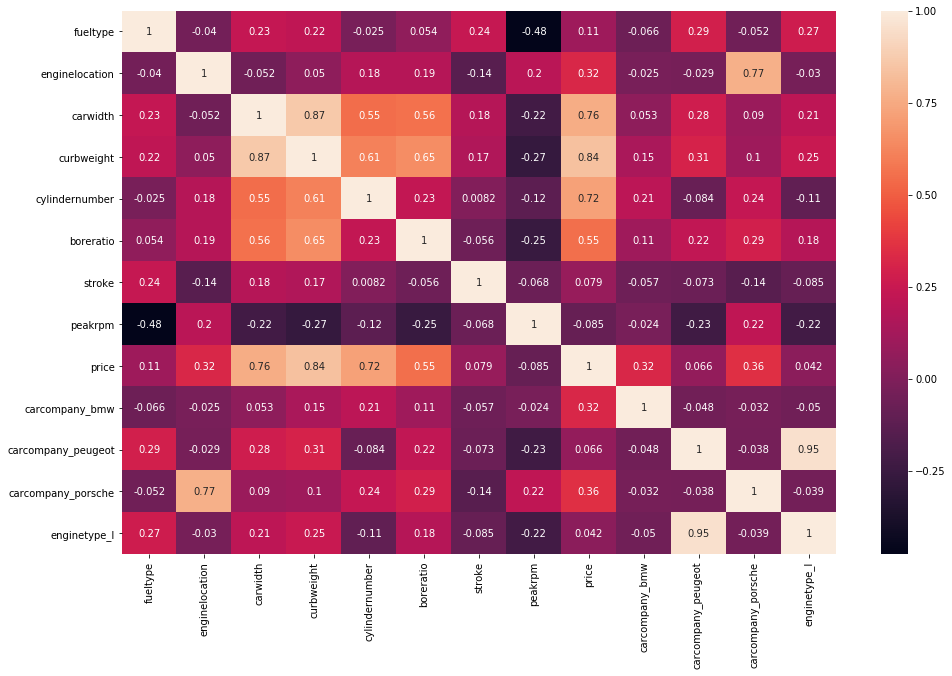

In [135]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 5
#### Dropping the Variable "boreratio" which has very high VIF and p-value

In [136]:
x_train.head()

,const,fueltype,enginelocation,carwidth,curbweight,cylindernumber,boreratio,stroke,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.291667,0.272692,0.2,0.307143,0.552381,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.666667,0.500388,0.2,1.000000,0.495238,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.308333,0.314973,0.2,0.500000,0.480952,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.316667,0.411171,0.2,0.664286,0.290476,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.575000,0.647401,0.2,0.771429,0.514286,0.387755,0.0,0.0,0.0,0.0


In [137]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('boreratio', 1)
rfe_un_supported_col.append('boreratio')

In [138]:
# Create a second fitted model
lm5 = sm.OLS(y_train,x_train).fit()

In [139]:
#Let's see the summary of our second linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.02e-63
Time:                        21:29:49   Log-Likelihood:                 206.55
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     131   BIC:                            -353.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2314      0

In [140]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
2,carwidth,35.33
3,curbweight,27.10
8,carcompany_peugeot,13.14
10,enginetype_l,12.33
5,stroke,11.40
4,cylindernumber,10.89
6,peakrpm,5.93
1,enginelocation,2.79
9,carcompany_porsche,2.76
0,fueltype,1.68


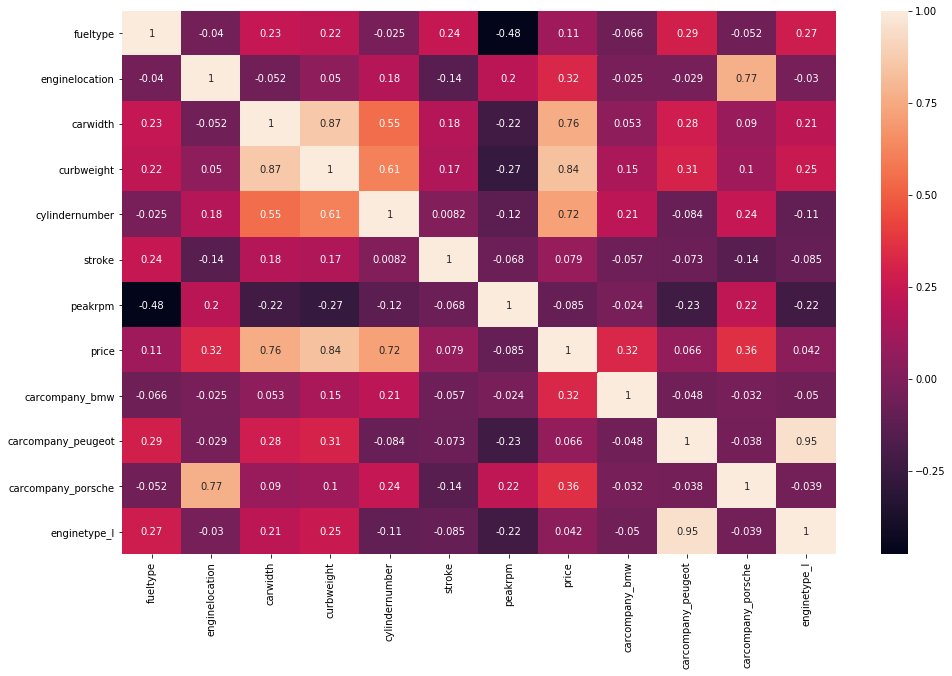

In [141]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 6
#### Dropping the Variable "stroke" which has very high VIF and p-value

In [142]:
x_train.head()

,const,fueltype,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.291667,0.272692,0.2,0.552381,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.666667,0.500388,0.2,0.495238,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.308333,0.314973,0.2,0.480952,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.316667,0.411171,0.2,0.290476,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.575000,0.647401,0.2,0.514286,0.387755,0.0,0.0,0.0,0.0


In [143]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('stroke', 1)
rfe_un_supported_col.append('stroke')

In [144]:
# Create a second fitted model
lm6 = sm.OLS(y_train,x_train).fit()

In [145]:
#Let's see the summary of our second linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           9.78e-65
Time:                        21:29:51   Log-Likelihood:                 206.39
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2403      0

In [146]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
2,carwidth,33.35
3,curbweight,27.08
7,carcompany_peugeot,12.92
9,enginetype_l,12.24
4,cylindernumber,10.73
5,peakrpm,3.97
1,enginelocation,2.79
8,carcompany_porsche,2.64
0,fueltype,1.45
6,carcompany_bmw,1.13


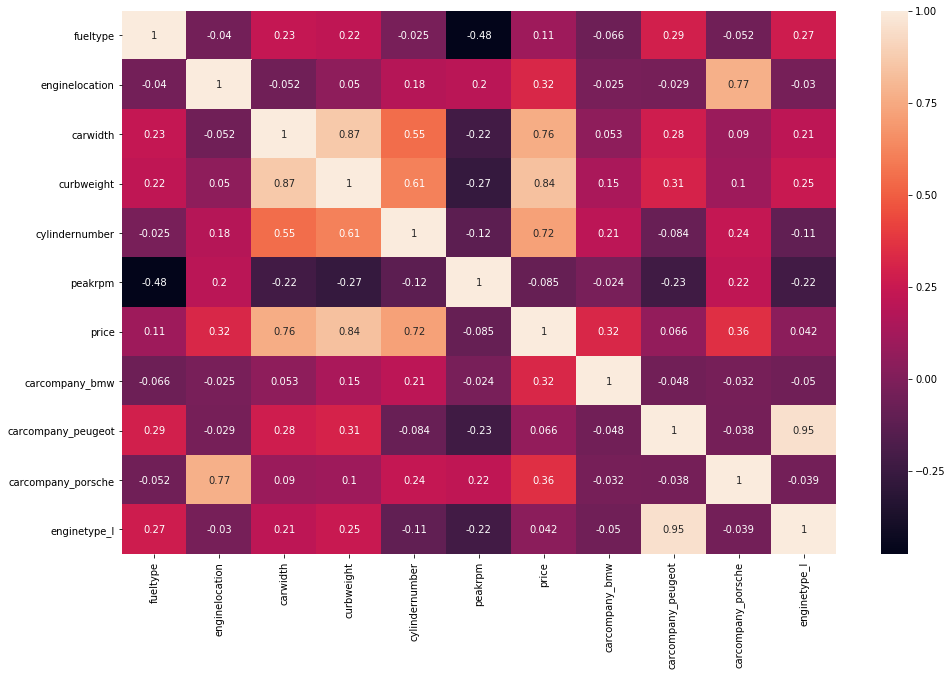

In [147]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 7
#### Dropping the Variable "carwidth" which has very high VIF and p-value

In [148]:
x_train.head()

,const,fueltype,enginelocation,carwidth,curbweight,cylindernumber,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.291667,0.272692,0.2,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.666667,0.500388,0.2,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.308333,0.314973,0.2,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.316667,0.411171,0.2,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.575000,0.647401,0.2,0.387755,0.0,0.0,0.0,0.0


In [149]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('carwidth', 1)
rfe_un_supported_col.append('carwidth')

In [150]:
# Create a second fitted model
lm7 = sm.OLS(y_train,x_train).fit()

In [151]:
#Let's see the summary of our second linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           1.82e-61
Time:                        21:29:53   Log-Likelihood:                 195.50
No. Observations:                 143   AIC:                            -371.0
Df Residuals:                     133   BIC:                            -341.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2081      0

In [152]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
6,carcompany_peugeot,12.80
8,enginetype_l,12.16
2,curbweight,10.48
3,cylindernumber,10.06
4,peakrpm,3.06
7,carcompany_porsche,2.57
1,enginelocation,2.51
0,fueltype,1.36
5,carcompany_bmw,1.10


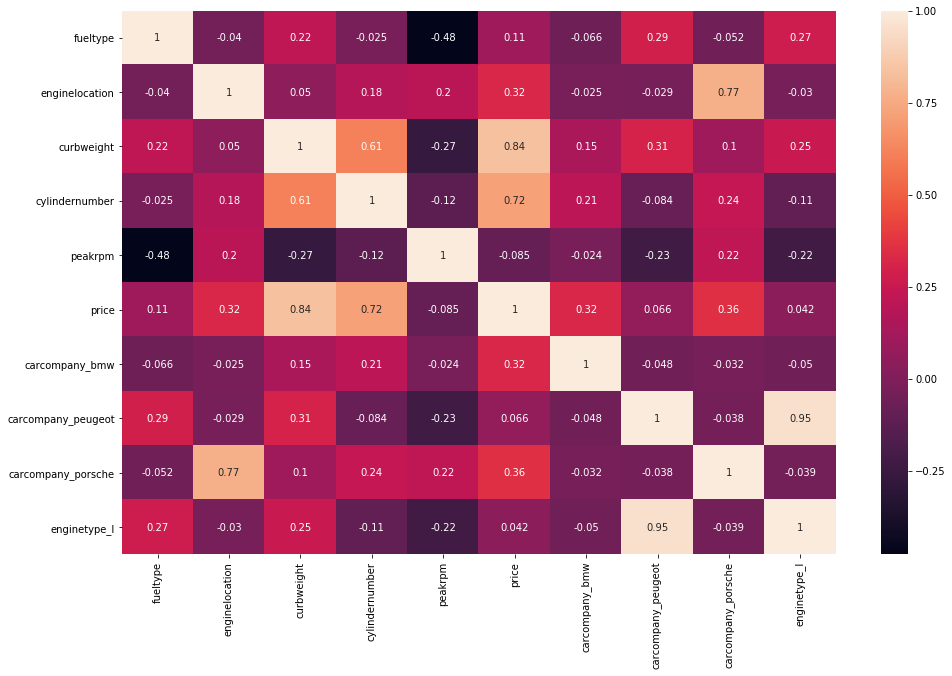

In [153]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

### Building model using sklearn : Model no 8
#### Dropping the Variable "carcompany_peugeot" which has very high VIF and has collinearility with enginetype_l

In [154]:
x_train.head()

,const,fueltype,enginelocation,curbweight,cylindernumber,peakrpm,carcompany_bmw,carcompany_peugeot,carcompany_porsche,enginetype_l
122,1.0,0.0,0.0,0.272692,0.2,0.551020,0.0,0.0,0.0,0.0
125,1.0,0.0,0.0,0.500388,0.2,0.551020,0.0,0.0,1.0,0.0
166,1.0,0.0,0.0,0.314973,0.2,1.000000,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.411171,0.2,0.346939,0.0,0.0,0.0,0.0
199,1.0,0.0,0.0,0.647401,0.2,0.387755,0.0,0.0,0.0,0.0


In [155]:
# Dropping highly correlated variables and insignificant variables
x_train = x_train.drop('carcompany_peugeot', 1)
rfe_un_supported_col.append('carcompany_peugeot')

In [156]:
# Create a second fitted model
lm8 = sm.OLS(y_train,x_train).fit()

In [157]:
#Let's see the summary of our second linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 26 Aug 2018   Prob (F-statistic):           8.87e-60
Time:                        21:29:54   Log-Likelihood:                 188.61
No. Observations:                 143   AIC:                            -359.2
Df Residuals:                     134   BIC:                            -332.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2003      0

In [158]:
# Calculating Vif value
vif_cal(input_data=carprice_df.drop(rfe_un_supported_col, axis=1), dependent_col="price")

,Var,Vif
2,curbweight,9.96
3,cylindernumber,9.82
4,peakrpm,3.03
6,carcompany_porsche,2.57
1,enginelocation,2.51
0,fueltype,1.36
7,enginetype_l,1.32
5,carcompany_bmw,1.10


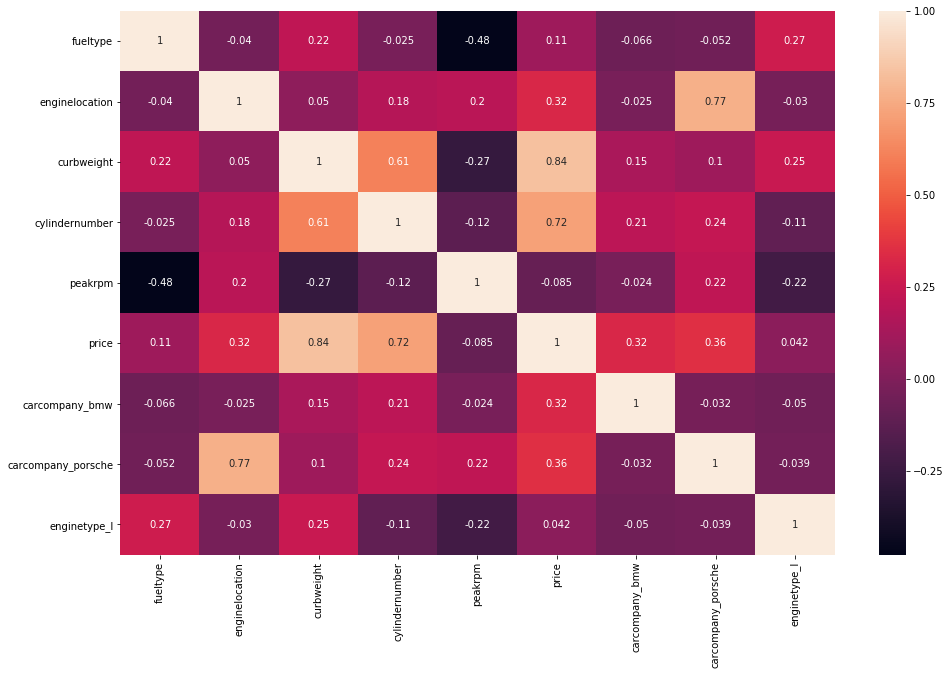

In [159]:
# Let's see the correlation matrix 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(carprice_df.drop(rfe_un_supported_col, axis=1).corr(),annot = True)

## Making Predictions Using the Final Model

### Prediction with Final Model (lm8)

In [160]:
# Adding  constant variable to test dataframe
x_test_finalmodel = sm.add_constant(x_test)

In [161]:
# Creating X_test_m6 dataframe by dropping variables from X_test_m6
x_test_finalmodel = x_test_finalmodel.drop(rfe_un_supported_col, axis=1)

In [162]:
# Making predictions
y_pred_finalmodel = lm8.predict(x_test_finalmodel)

## Model Evaluation

Text(0,0.5,'Car Price')

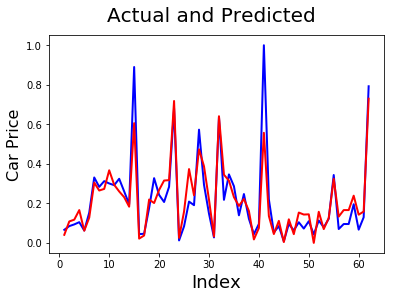

In [163]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_finalmodel, color="red",  linewidth=2, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'y_pred_finalmodel')

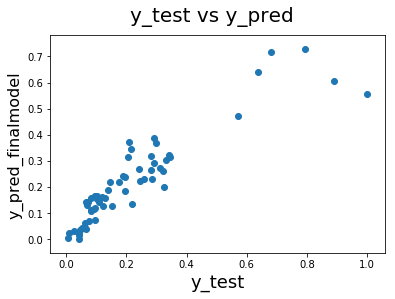

In [164]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_finalmodel)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_finalmodel', fontsize=16)                          # Y-label

Text(0,0.5,'ytest-ypred')

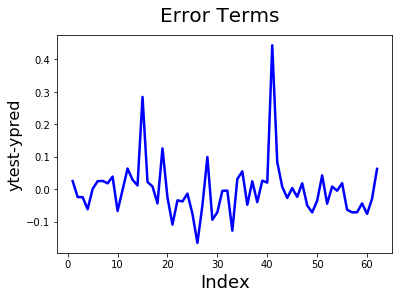

In [165]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_finalmodel, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

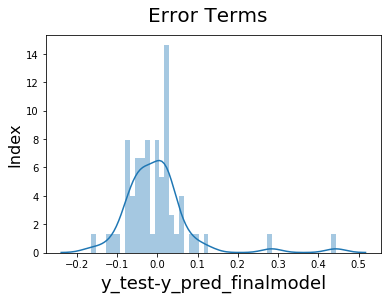

In [166]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_finalmodel),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred_finalmodel', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [167]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_finalmodel)))

RMSE : 0.0863262636775
